# STANZA

### IMPORTS, VARIABLES

In [1]:
import conllu
import stanza
import sklearn.metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

In [36]:
file_xpos = '../data/memoirs_3k_corrected.conllu'
file_upos = '../data/memoirs_10k_corrected.conllu'
test_file = '../data/ud-treebanks/UD_Polish-PDB/pl_pdb-ud-test.conllu'

labels_upos = '../data/labels_upos.txt'
labels_xpos = '../data/labels_xpos.txt'

In [3]:
from functions import *
from preproc_bert import remove_ranges

### FUNCTIONS

In [4]:
def get_stanza_anns(sentences: list, processors: str, tag_type: str):
    '''A function that obtains and processes Stanza lemmatization annotations.
    
    Args:
        sentences (list): A list of lists of tokenized sentences.
        processors (str): The kind of processing that is desired as per Stanza documentation
        tag_type (str): The type of tag that should get retrieved.
        
    Returns:
        A list lists representing the Stanza lemmatization annotations.
    '''
    # defining the stanza pipeline
    nlp = stanza.Pipeline(lang='pl', processors=processors, tokenize_pretokenized=True)
    # getting stanza annotations
    annotations = []
    for i, sent in enumerate(tqdm(sentences, desc='Retrieving annotations per sentence...')):
        sent = ' '.join(sent)
        pred = nlp(sent)
        sent_annotations = []
        # getting out the lemmas
        for entry in pred.to_dict()[0]:
            sent_annotations.append(entry[tag_type])
        annotations.append(sent_annotations)
            
    return annotations

### EXECUTION - MODERN

In [5]:
labels_upos_list = get_labels(labels_upos)

In [37]:
labels_xpos_list = get_labels(labels_xpos)

In [6]:
test_tokens_upos, _ = extract_conllu_data(test_file, 'upos', sentences=True, combined=True)
test_tokens_xpos, _ = extract_conllu_data(test_file, 'xpos', sentences=True, combined=True)
test_tokens_lemmas, _ = extract_conllu_data(test_file, 'lemma', sentences=True, combined=True)

# transforming it to a tagging-friendly format
test_tokens, test_upos = make_tagger_friendly(test_tokens_upos)
_, test_xpos = make_tagger_friendly(test_tokens_xpos)
_, test_lemmas = make_tagger_friendly(test_tokens_lemmas)

In [7]:
test_upos_annotations = get_stanza_anns(test_tokens, 'tokenize,mwt,pos', 'upos')

2023-11-08 08:25:46 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-11-08 08:25:47 INFO: Loading these models for language: pl (Polish):
| Processor | Package    |
--------------------------
| tokenize  | pdb        |
| mwt       | pdb        |
| pos       | pdb_charlm |

2023-11-08 08:25:47 INFO: Using device: cpu
2023-11-08 08:25:47 INFO: Loading: tokenize
2023-11-08 08:25:47 INFO: Loading: mwt
2023-11-08 08:25:47 INFO: Loading: pos
2023-11-08 08:25:47 INFO: Done loading processors!
Retrieving annotations per sentence...: 100%|███████████████████████████████████████| 2215/2215 [04:32<00:00,  8.14it/s]


In [8]:
test_xpos_annotations = get_stanza_anns(test_tokens, 'tokenize,mwt,pos', 'xpos')

2023-11-08 08:30:19 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-11-08 08:30:20 INFO: Loading these models for language: pl (Polish):
| Processor | Package    |
--------------------------
| tokenize  | pdb        |
| mwt       | pdb        |
| pos       | pdb_charlm |

2023-11-08 08:30:20 INFO: Using device: cpu
2023-11-08 08:30:20 INFO: Loading: tokenize
2023-11-08 08:30:20 INFO: Loading: mwt
2023-11-08 08:30:20 INFO: Loading: pos
2023-11-08 08:30:20 INFO: Done loading processors!
Retrieving annotations per sentence...: 100%|███████████████████████████████████████| 2215/2215 [05:30<00:00,  6.70it/s]


In [9]:
get_measures(test_upos, test_upos_annotations, labels=labels_upos_list, details=True)

MEASURES:
Accuracy: 98.79%
Precision (weighted): 98.80%
Recall (weighted): 98.79%
F1 (weighted): 98.78%
Matthew's Correlation Coefficient: 98.61%

MEASURES PER CLASS:
Precision:
	ADJ: 98.96%
	ADP: 99.55%
	ADV: 96.11%
	AUX: 97.97%
	CCONJ: 94.54%
	DET: 98.71%
	INTJ: 100.00%
	NOUN: 99.45%
	NUM: 98.87%
	PART: 98.06%
	PRON: 98.76%
	PROPN: 93.91%
	PUNCT: 99.95%
	SCONJ: 96.79%
	SYM: 50.00%
	VERB: 99.41%
	X: 94.48%
Recall:
	ADJ: 99.23%
	ADP: 99.91%
	ADV: 97.34%
	AUX: 97.50%
	CCONJ: 97.99%
	DET: 99.06%
	INTJ: 70.00%
	NOUN: 98.91%
	NUM: 98.87%
	PART: 89.41%
	PRON: 99.44%
	PROPN: 98.12%
	PUNCT: 99.95%
	SCONJ: 96.65%
	SYM: 25.00%
	VERB: 99.43%
	X: 94.17%



In [10]:
test_full_upos = get_full_table(test_upos, test_upos_annotations, test_tokens)
test_full_upos.to_excel('../data/results/test_stanza_upos.xlsx')

In [11]:
test_upos_comparison = get_comparison(test_upos, test_upos_annotations, test_tokens)
test_upos_comparison.to_excel('../data/mistakes/test_stanza_UPOS_mistakes.xlsx')

In [12]:
get_measures(test_xpos, test_xpos_annotations)

MEASURES:
Accuracy: 94.76%
Precision (weighted): 94.85%
Recall (weighted): 94.76%
F1 (weighted): 94.61%
Matthew's Correlation Coefficient: 94.55%


In [13]:
test_full_xpos = get_full_table(test_xpos, test_xpos_annotations, test_tokens)
test_full_xpos.to_excel('../data/results/test_stanza_xpos.xlsx')

In [14]:
test_xpos_comparison = get_comparison(test_xpos, test_xpos_annotations, test_tokens)
test_xpos_comparison.to_excel('../data/mistakes/test_stanza_XPOS_mistakes.xlsx')

### EXECUTION - HISTORICAL

In [15]:
tokens_upos, _ = extract_conllu_data(file_upos, 'upos', sentences=True, combined=True)
tokens_xpos, _ = extract_conllu_data(file_xpos, 'xpos', sentences=True, combined=True)
tokens_lemmas, _ = extract_conllu_data(file_xpos, 'lemma', sentences=True, combined=True)

tokens_10k, upos = make_tagger_friendly(tokens_upos)
tokens_3k, xpos = make_tagger_friendly(tokens_xpos)
_, lemmas = make_tagger_friendly(tokens_lemmas)

In [16]:
upos_annotations = get_stanza_anns(tokens_10k, 'tokenize,mwt,pos', 'upos')

2023-11-08 08:35:59 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-11-08 08:36:00 INFO: Loading these models for language: pl (Polish):
| Processor | Package    |
--------------------------
| tokenize  | pdb        |
| mwt       | pdb        |
| pos       | pdb_charlm |

2023-11-08 08:36:00 INFO: Using device: cpu
2023-11-08 08:36:00 INFO: Loading: tokenize
2023-11-08 08:36:00 INFO: Loading: mwt
2023-11-08 08:36:00 INFO: Loading: pos
2023-11-08 08:36:00 INFO: Done loading processors!
Retrieving annotations per sentence...: 100%|█████████████████████████████████████████| 360/360 [01:20<00:00,  4.45it/s]


In [17]:
xpos_annotations = get_stanza_anns(tokens_3k, 'tokenize,mwt,pos', 'xpos')

2023-11-08 08:37:21 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-11-08 08:37:21 INFO: Loading these models for language: pl (Polish):
| Processor | Package    |
--------------------------
| tokenize  | pdb        |
| mwt       | pdb        |
| pos       | pdb_charlm |

2023-11-08 08:37:21 INFO: Using device: cpu
2023-11-08 08:37:21 INFO: Loading: tokenize
2023-11-08 08:37:21 INFO: Loading: mwt
2023-11-08 08:37:21 INFO: Loading: pos
2023-11-08 08:37:22 INFO: Done loading processors!
Retrieving annotations per sentence...: 100%|█████████████████████████████████████████| 115/115 [00:25<00:00,  4.55it/s]


In [18]:
get_measures(upos, upos_annotations, labels=labels_upos_list, details=True)

MEASURES:
Accuracy: 94.15%
Precision (weighted): 94.46%
Recall (weighted): 94.15%
F1 (weighted): 94.17%
Matthew's Correlation Coefficient: 93.39%

MEASURES PER CLASS:
Precision:
	ADJ: 93.00%
	ADP: 99.92%
	ADV: 87.75%
	AUX: 88.62%
	CCONJ: 97.98%
	DET: 95.78%
	INTJ: 0.00%
	NOUN: 96.36%
	NUM: 97.25%
	PART: 90.66%
	PRON: 91.54%
	PROPN: 77.99%
	PUNCT: 100.00%
	SCONJ: 89.81%
	SYM: 0.00%
	VERB: 94.94%
	X: 74.55%
Recall:
	ADJ: 91.69%
	ADP: 99.33%
	ADV: 91.12%
	AUX: 82.89%
	CCONJ: 98.16%
	DET: 84.22%
	INTJ: 0.00%
	NOUN: 92.83%
	NUM: 79.70%
	PART: 80.10%
	PRON: 94.26%
	PROPN: 98.29%
	PUNCT: 100.00%
	SCONJ: 92.96%
	SYM: 0.00%
	VERB: 96.45%
	X: 62.12%



In [19]:
full_upos = get_full_table(upos, upos_annotations, tokens_10k)
full_upos.to_excel('../data/results/new_stanza_upos.xlsx')

In [20]:
upos_comparison = get_comparison(upos, upos_annotations, tokens_10k)
upos_comparison.to_excel('../data/mistakes/new_stanza_UPOS_mistakes.xlsx')

In [21]:
upos_comparison

,Token,Context,Gold Standard,Prediction
0,Komornika,Jana Komornika ziemi,NOUN,PROPN
1,Dobrrzyńskiej,ziemi Dobrrzyńskiej (,ADJ,PROPN
2,nie,a nie Antoniego,PART,CCONJ
3,ś,bratem ś .,X,AUX
4,Pinińskich,z Pinińskich właścicieli,PROPN,ADJ
5,Dóbr,właścicieli Dóbr Strużewo,NOUN,PROPN
6,Rodzeństwa,pomiędzy Rodzeństwa –,NOUN,PROPN
7,Dobrzyńskiej,ziemi Dobrzyńskiej za,PROPN,ADJ
8,Panna,siostra Panna Urszula,NOUN,PROPN
9,Stryjów,. Stryjów miał,NOUN,PROPN


In [22]:
get_measures(xpos, xpos_annotations)

MEASURES:
Accuracy: 88.05%
Precision (weighted): 89.46%
Recall (weighted): 88.05%
F1 (weighted): 88.14%
Matthew's Correlation Coefficient: 87.67%


In [23]:
full_xpos = get_full_table(xpos, xpos_annotations, tokens_3k)
full_xpos.to_excel('../data/results/new_stanza_xpos.xlsx')

In [24]:
xpos_comparison = get_comparison(xpos, xpos_annotations, tokens_3k)
xpos_comparison.to_excel('../data/mistakes/new_stanza_XPOS_mistakes.xlsx')

In [25]:
xpos_comparison

,Token,Context,Gold Standard,Prediction
0,parafii,Godziszewo parafii Rypnin,subst:sg:loc:f,subst:sg:gen:f
1,Rypnin,parafii Rypnin syn,subst:sg:nom:m3,subst:pl:gen:n:pt
2,Dobrrzyńskiej,ziemi Dobrrzyńskiej (,adj:sg:gen:f:pos,subst:sg:gen:f
3,nie,a nie Antoniego,part,conj
4,ś,bratem ś .,brev:pun,aglt:sg:sec:imperf:nwok
5,wdokumentach,później wdokumentach się,subst:pl:loc:m3,subst:pl:gen:f
6,Pinińskich,z Pinińskich właścicieli,subst:pl:gen:m1,adj:pl:gen:m1:pos
7,Strużewo,Dóbr Strużewo z,subst:sg:nom:n:ncol,subst:sg:gen:n:ncol
8,Puszczanki,"adlinencjami Puszczanki ,",subst:sg:gen:f,subst:sg:gen:n
9,Ronantowizna,", Ronantowizna ,",subst:sg:nom:f,subst:sg:gen:f


### VISUALIZATIONS

In [26]:
cm = sklearn.metrics.confusion_matrix(
    [x for sentence in upos for x in sentence], 
    [x for sentence in upos_annotations for x in sentence], 
    #labels=labels_upos_list,
    normalize='true'  # recall
)

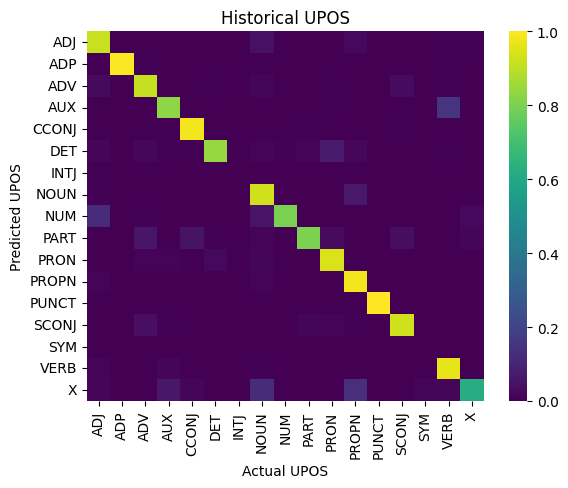

In [27]:
sns.heatmap(cm, cmap='viridis', xticklabels=labels_upos_list, yticklabels=labels_upos_list).set(title='Historical UPOS', ylabel='Predicted UPOS', xlabel='Actual UPOS')
plt.savefig("upos_confusion_matrix.jpg", bbox_inches='tight')

In [28]:
cm = sklearn.metrics.confusion_matrix(
    [x for sentence in test_upos for x in sentence], 
    [x for sentence in test_upos_annotations for x in sentence], 
    labels=labels_upos_list,
    normalize='true'  # recall
)

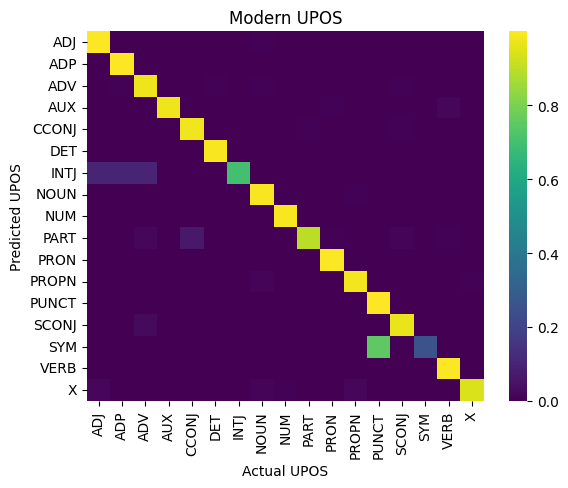

In [29]:
sns.heatmap(cm, cmap='viridis', xticklabels=labels_upos_list, yticklabels=labels_upos_list).set(title='Modern UPOS', ylabel='Predicted UPOS', xlabel='Actual UPOS')
plt.savefig("modern_upos_confusion_matrix.jpg", bbox_inches='tight')

In [42]:
cm = sklearn.metrics.confusion_matrix(
    [x for sentence in xpos for x in sentence], 
    [x for sentence in xpos_annotations for x in sentence], 
    #labels=labels_xpos_list,
    normalize='true'  # recall
)

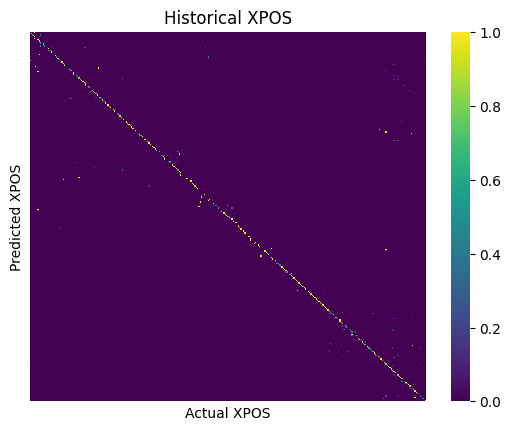

In [43]:
sns.heatmap(cm, cmap='viridis', xticklabels=False, yticklabels=False).set(title='Historical XPOS', ylabel='Predicted XPOS', xlabel='Actual XPOS')
plt.savefig("xpos_confusion_matrix.jpg", bbox_inches='tight')

In [44]:
cm = sklearn.metrics.confusion_matrix(
    [x for sentence in test_xpos for x in sentence], 
    [x for sentence in test_xpos_annotations for x in sentence], 
    #labels=labels_xpos_list,
    normalize='true'  # recall
)

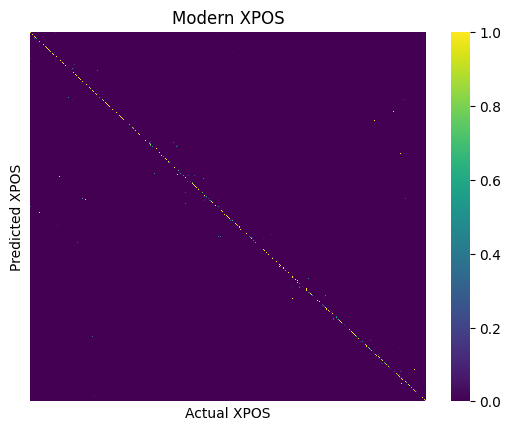

In [45]:
sns.heatmap(cm, cmap='viridis', xticklabels=False, yticklabels=False).set(title='Modern XPOS', ylabel='Predicted XPOS', xlabel='Actual XPOS')
plt.savefig("modern_xpos_confusion_matrix.jpg", bbox_inches='tight')